In [2]:
import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
import numpy as np
import os
#!{sys.executable} -m pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import importlib
import utils.exploratoryUtils

warnings.filterwarnings('ignore')
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
#__file__ = str(Path.cwd().parents[0] / "utils")
# in standard python
module_path = str(Path.cwd().parents[0] / "utils")

if module_path not in sys.path:
    sys.path.append(module_path)
import utils.exploratoryUtils as exU
importlib.reload(exU)


paths = []
labels = []
for dirname, _, filenames in os.walk('../tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
if len(labels) > 0 and len(paths) > 0:
    print ('dataset is loaded')
else:
    print("dataset error")


pathsSI = []
labelsSI = []
for dirname, _, filenames in os.walk('../Stimuli_Intensitätsmorphs'):
    for filename in filenames:
        pathsSI.append(os.path.join(dirname, filename))
        label = filename.split('_')[1]
        label = label.split('.')[0]
        labelsSI.append(label.lower())
if len(labelsSI) > 0 and len(pathsSI) > 0:
    print ('dataset is loaded')
else:
    print("dataset error")


df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


dfSI = pd.DataFrame()
dfSI['speech'] = pathsSI
dfSI['label'] = labelsSI
dfSI.head()

dataset is loaded
dataset is loaded


,speech,label
0,../Stimuli_Intensitätsmorphs/nf02_ang_w05_o_10...,ang
1,../Stimuli_Intensitätsmorphs/nm01_ang_w01_o_50...,ang
2,../Stimuli_Intensitätsmorphs/nf04_sur_w03_c_10...,sur
3,../Stimuli_Intensitätsmorphs/nf03_hap_w01_o_75...,hap
4,../Stimuli_Intensitätsmorphs/nm01_fea_w01_o_50...,fea


In [3]:
# paths = []
# labels = []
# for dirname, _, filenames in os.walk('../tess'):
#     for filename in filenames:
#         paths.append(os.path.join(dirname, filename))
#         label = filename.split('_')[-1]
#         label = label.split('.')[0]
#         labels.append(label.lower())
# if len(labels) > 0 and len(paths) > 0:
#     print ('dataset is loaded')
# else:
#     print("dataset error")
#
#
# pathsSI = []
# labelsSI = []
# for dirname, _, filenames in os.walk('../Stimuli_Intensitätsmorphs'):
#     for filename in filenames:
#         pathsSI.append(os.path.join(dirname, filename))
#         label = filename.split('_')[1]
#         label = label.split('.')[0]
#         labelsSI.append(label.lower())
# if len(labelsSI) > 0 and len(pathsSI) > 0:
#     print ('dataset is loaded')
# else:
#     print("dataset error")


*Convert into a dataframe*

In [4]:
# df = pd.DataFrame()
# df['speech'] = paths
# df['label'] = labels
# df.head()
#
#
# dfSI = pd.DataFrame()
# dfSI['speech'] = pathsSI
# dfSI['label'] = labelsSI
# dfSI.head()

### Exploratory Data Analysis

<AxesSubplot: xlabel='label', ylabel='count'>

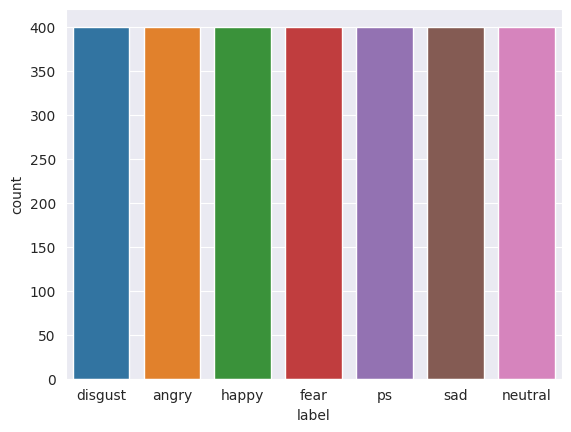

In [5]:
sns.countplot(x ='label', data= df)

<AxesSubplot: xlabel='label', ylabel='count'>

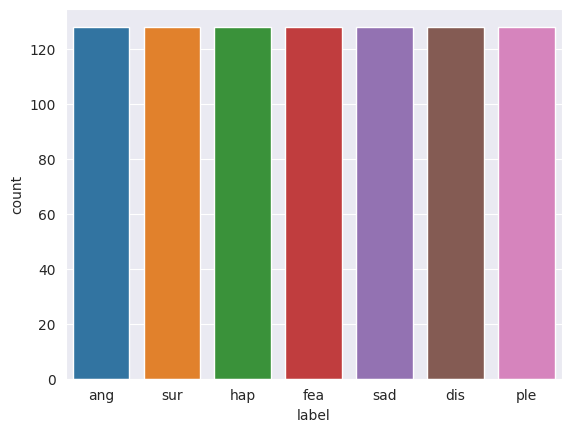

In [6]:
sns.countplot(x='label', data=dfSI)

In [7]:
#import sys
#module_path = os.path.abspath(os.path.join('..', 'utils'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

## Add paths

In [8]:
# import sys
# from pathlib import Path
#
# # in jupyter (lab / notebook), based on notebook path
# #__file__ = str(Path.cwd().parents[0] / "utils")
# # in standard python
# module_path = str(Path.cwd().parents[0] / "utils")
#
# if module_path not in sys.path:
#     sys.path.append(module_path)
# import utils.exploratoryUtils as exU
# importlib.reload(exU)

In [9]:
#exU.spectogram()

In [10]:
# paths = df['speech'][df['label']=="fear"]
# for path in paths:
#     data, sampling_rate =librosa.load(path)
#     print(sampling_rate)


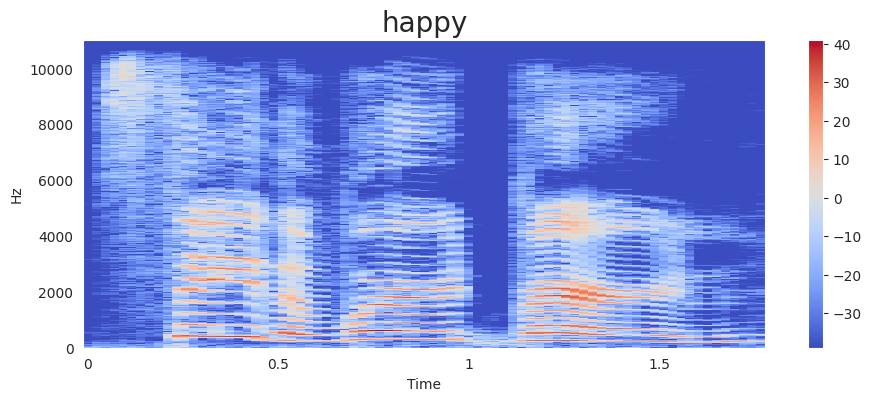

In [11]:
emotion = 'happy'
importlib.reload(exU)
#df['speech'][df['label'] == 'fear'][1]
path = df['speech'][df['label']==emotion].iloc[5]
data, sampling_rate =librosa.load(path)
# exU.waveplot(data, sampling_rate, emotion)
exU.spectogram(data, sampling_rate, emotion)
# exU.extract_f0(path, offset=0.5, duration=1)
Audio(path)
# exU.extract_mfcc(path, offset=0.5, duration=3)
# exU.extract_f0(path)

In [12]:
importlib.reload(exU)
exU.average_spectrogramm(df['speech'][df['label']=='happy'], "happy", offset=0, duration=1)
exU.average_spectrogramm(df['speech'][df['label']=='sad'], "sad", offset=0, duration=1)
exU.average_spectrogramm(df['speech'][df['label']=='fear'], "fear", offset=0, duration=1)
exU.average_spectrogramm(df['speech'][df['label']=='angry'], "angry", offset=0, duration=1)
exU.average_spectrogramm(df['speech'][df['label']=='neutral'], "neutral", offset=0, duration=1)

KeyboardInterrupt: 

In [ ]:
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='happy'], offset=0.5, duration=1.2, label="happy")
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='sad'], offset=0.5, duration=1.2, label="sad")
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='ps'], offset=0.5, duration=1.2, label="ps")
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='fear'], offset=0.5, duration=1.2, label="fear")
exU.extract_f0(path, offset=0.5, duration=2)

In [ ]:
exU.average_waveplot(df['speech'][df['label']=='happy'], "happy average", offset=0, duration=1)


In [ ]:
exU.average_waveplot(dfSI['speech'][dfSI['label']=='hap'], "happy average SI", offset=0, duration=1)


In [ ]:
exU.average_waveplot(dfSI['speech'][dfSI['label']=='sad'], "sad average SI", offset=0, duration=1)



In [ ]:
data_sad, sampling_rate = exU.average_waveplot(df['speech'][df['label']=='sad'], "sad average")


In [ ]:
exU.extract_f0_data(data_sad, sampling_rate, "sad")